# SVM分類問題

## 目錄
* 模擬版資料做SVM
* e.g.

  (1)meshgrid函數
  
  
* contour用法 (等高線)
* 終極版資料視覺化
* e.g. SVM例子 : 鳶尾花分類

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1 模擬版資料做SVM
Q : 為何輸入是二維?

A : 因為可以畫出來

### step 1 創造資料

In [2]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

In [3]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [4]:
x[:, 0]

array([ 6, 10,  3,  8])

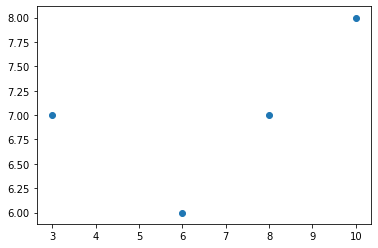

In [5]:
plt.scatter(x[:, 0], x[:, 1])

### step 2 分類 : 分成1、2類
* [3, 7], [6, 6]一組
* [10, 8], [8, 7]一組

In [6]:
y = np.array([1, 2, 1, 2])

* c=y : 顏色由'y'決定 
* s=150 : 面積

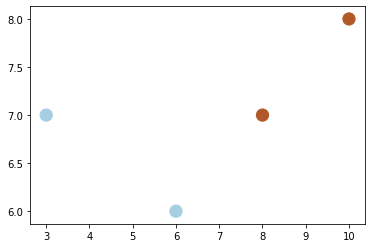

In [7]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=150) 

###  step 3 SVM

#### step 1 打開函數學習機器

#### ● SVC : SVM的分類器 (classifier)

In [8]:
from sklearn.svm import SVC

* 為了不要出現警告，我們寫入gamma = 'auto'

In [9]:
clf = SVC(gamma = 'auto')

#### step 2訓練
* 下面是警告 (FutureWarning)，可以不理會
* gamma為控制分類精確度，此處說明'auto'未來會改成'scale'
* 為了不要出現警告，我們於上方寫入gamma = 'auto'

In [10]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### step 3預測

In [11]:
y_predict = clf.predict(x)

In [12]:
y_predict

array([1, 2, 1, 2])

In [13]:
y

array([1, 2, 1, 2])

#### step 4 隨便生成一組數字testing

* xr = np.random.rand(100)全部都在[0, 1]間
* 我們把它變到[3, 10]間

In [14]:
xr = np.random.rand(100) * 7 + 3
yr = np.random.rand(100) * 2 + 6

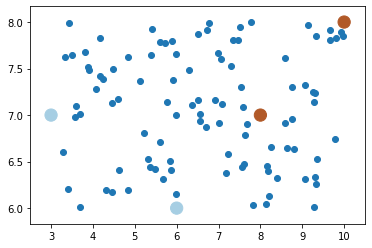

In [15]:
plt.scatter(xr, yr)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=150)

In [16]:
print('X', xr[:5] )
print('Y', yr[:5] )

X [5.40950318 8.79569466 9.93096601 9.35588649 4.44986403]
Y [7.92798903 6.63768889 7.8885625  6.53228245 7.13381748]


#### step 4.1 我們要將xr, yr放一起

In [17]:
X = np.c_[xr, yr]

In [18]:
Y = clf.predict(X)

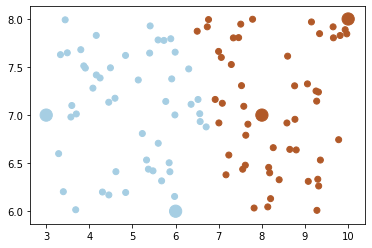

In [19]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=150)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='Paired')

### 2 E.g.

### 錯誤結果呈現

In [20]:
x_list = np.linspace(3, 10, 50)

#y不一定要找50個點
y_list = np.linspace(6, 8, 50)

In [21]:
X = np.c_[x_list, y_list]

* 因為我們的確都在x上切，在y上切，然後第一個x跟第一個x合起來，第一個y跟第一個y合起來

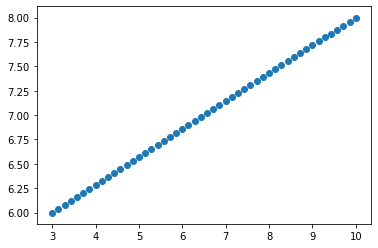

In [22]:
plt.scatter(X[:, 0], X[:, 1])

#### ● 解釋上方的圖片
![說明](a.jpg)

#### * Our Goal
![說明](b.jpg)

#### ● Method
![說明](c.jpg)

#### ● Result
#### e.g.   x 座標  (y 座標同理)
![說明](d.jpg)

### 正確結果呈現

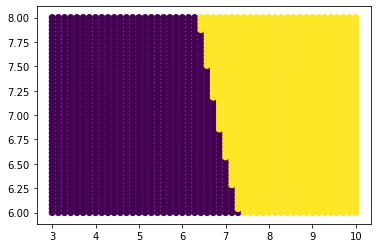

In [23]:
x_list = np.linspace(3, 10, 50)

#y不一定要找50個點
y_list = np.linspace(6, 8, 50)

X, Y = np.meshgrid(x_list, y_list)
P = np.c_[X.ravel(), Y.ravel()]

C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C)

In [24]:
#X.ravel()

### 3 插播: contour用法 (等高線)

In [25]:
xL = np.array([1, 2, 3, 4])
yL = np.array([5, 6, 7, 8])
X, Y = np.meshgrid(xL, yL)

In [26]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [27]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [28]:
#Z = np.random.randint(1, 3, (4,4))
#Z

### (1) Contour函數  

#### Q:為何只有兩種高度卻有很多個顏色?
#### A: 等高線只有紫色(highest)/黃色

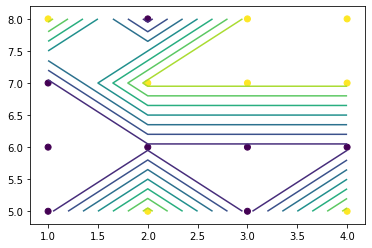

In [29]:
#每次的Z都不同
#(4,4) : 為了與 X, Y大小一樣 
Z = np.random.randint(1, 3, (4,4))
plt.contour(X,Y,Z)

plt.scatter(X.ravel(), Y.ravel(), c = Z.ravel())

### (2) contourf函數 

#### Q:為何只有兩種高度卻有很多個顏色?
#### A: 等高線只有紫色(highest)/黃色

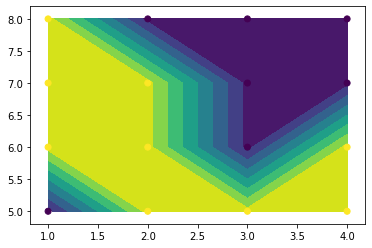

In [30]:
#每次的Z都不同
Z = np.random.randint(1, 3, (4,4))
plt.contourf(X,Y,Z)

plt.scatter(X.ravel(), Y.ravel(), c = Z.ravel())

### 3 終極版資料視覺化

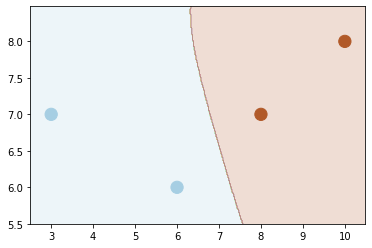

In [31]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)

X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)

#做contour 'X'須與'z'的格式一樣
Z = z.reshape(X.shape)

#alpha = 0.2:透明度
plt.contourf(X, Y, Z, cmap='Paired', alpha = 0.2)

#與原本的比較
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=150)

In [32]:
#X.shape
#z.shape

### 4 E.g.   SVM例子 : 鳶尾花分類

### 數據庫

*  三種品種
* Goal : 分辨品種

![說明](f.jpg)


### step 1 讀入鳶尾花數據庫

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

In [35]:
#print(iris.DESCR)

* sklearn幫我們分好了

In [36]:
x = iris.data 
y = iris.target

In [37]:
#x[:5]

In [38]:
#y[:5]

### step 2  讀兩組資料進來訓練
Q : why?

A : easy to paint

In [39]:
X = x[:,:2]

In [40]:
Y = y 

In [41]:
len(X)

150

### step 3 區分訓練資料、測試資料

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

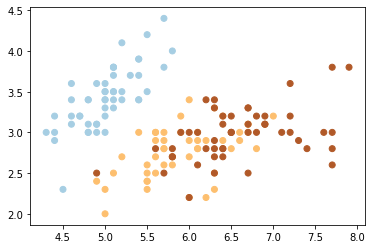

In [44]:
plt.scatter(X[:,0],X[:,1], c=Y, cmap='Paired')

### step 4 進行數據分析

#### step 1 開一台函數學習機

In [45]:
clf = SVC(gamma='auto')

#### step 2 訓練

In [46]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### step 3 預測

In [47]:
y_predict = clf.predict(x_test)

In [48]:
y_predict 

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [49]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### step 4 預測的好不好

In [50]:
print(y_predict != y_test)

[ True False False False False False False  True  True  True  True  True
  True  True  True False False False False False  True False False False
 False False False  True False False]


In [51]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

#### 紫色/黃色是錯誤的

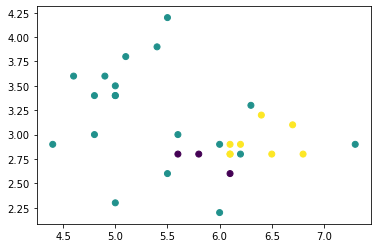

In [52]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_predict-y_test)

#### step 5 隨便生成一組數字testing

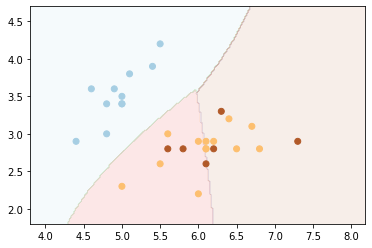

In [55]:
x0 = np.arange(3.8, 8.2, 0.02)
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap = 'Paired', alpha=0.1)
plt.scatter(x_test[:,0], x_test[:,1], cmap = 'Paired', c=y_test)

### ???
Q:如何優化 ? 

A:選擇其他行去做，下周會講其他方式